In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('singapore_airlines_reviews.csv')

# Display the first few rows of the dataframe
print(df.head())

# Drop rows with missing values in the 'text' and 'rating' columns
df.dropna(subset=['text', 'rating'], inplace=True)

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the dataframe with the cleaned text
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to C:\Users\Anay
[nltk_data]     Malviya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anay
[nltk_data]     Malviya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anay
[nltk_data]     Malviya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              published_date published_platform  rating    type  \
0  2024-03-12T14:41:14-04:00            Desktop       3  review   
1  2024-03-11T19:39:13-04:00            Desktop       5  review   
2  2024-03-11T12:20:23-04:00            Desktop       1  review   
3  2024-03-11T07:12:27-04:00            Desktop       5  review   
4  2024-03-10T05:34:18-04:00            Desktop       2  review   

                                                text  \
0  We used this airline to go from Singapore to L...   
1  The service on Singapore Airlines Suites Class...   
2  Booked, paid and received email confirmation f...   
3  Best airline in the world, seats, food, servic...   
4  Premium Economy Seating on Singapore Airlines ...   

                                               title  helpful_votes  
0                                                 Ok              0  
1  The service in Suites Class makes one feel lik...              0  
2                         Don’t give them your mon

In [16]:
df.to_csv('file1.csv')

In [17]:


# Load the dataset
df1 = pd.read_csv('singapore_airlines_reviews.csv')

# Display the first few rows of the dataframe
print(df1.head())

# Drop rows with missing values in the 'text', 'title', and 'rating' columns
df1.dropna(subset=['text', 'title', 'rating'], inplace=True)

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Lemmatize and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the 'text' and 'title' columns
df1['cleaned_text'] = df1['text'].apply(preprocess_text)
df1['cleaned_title'] = df1['title'].apply(preprocess_text)

# Display the first few rows of the dataframe with the cleaned text and title
print(df1[['text', 'cleaned_text', 'title', 'cleaned_title']].head())


              published_date published_platform  rating    type  \
0  2024-03-12T14:41:14-04:00            Desktop       3  review   
1  2024-03-11T19:39:13-04:00            Desktop       5  review   
2  2024-03-11T12:20:23-04:00            Desktop       1  review   
3  2024-03-11T07:12:27-04:00            Desktop       5  review   
4  2024-03-10T05:34:18-04:00            Desktop       2  review   

                                                text  \
0  We used this airline to go from Singapore to L...   
1  The service on Singapore Airlines Suites Class...   
2  Booked, paid and received email confirmation f...   
3  Best airline in the world, seats, food, servic...   
4  Premium Economy Seating on Singapore Airlines ...   

                                               title  helpful_votes  
0                                                 Ok              0  
1  The service in Suites Class makes one feel lik...              0  
2                         Don’t give them your mon

In [18]:
df1.to_csv('file1.csv')

In [19]:
glove_path = 'glove.6B.100d.txt'  # Path to your GloVe file

# Load GloVe embeddings into a dictionary
glove_model = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_model[word] = vector


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine 'cleaned_text' and 'cleaned_title' for tokenization
df1['combined_text'] = df1['cleaned_text'] + " " + df1['cleaned_title']

# Tokenize the combined text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['combined_text'])
word_index = tokenizer.word_index

# Define a function to prepare text data
def prepare_text(df, column, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences(df[column])
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

# Prepare sequences for 'cleaned_text' and 'cleaned_title'
max_length_text = 100  # Define appropriate max lengths
max_length_title = 20

text_sequences = prepare_text(df1, 'cleaned_text', tokenizer, max_length_text)
title_sequences = prepare_text(df1, 'cleaned_title', tokenizer, max_length_title)


In [21]:
embedding_dim = 100  # As we are using 'glove.6B.100d.txt'

# Create the embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim), dtype=np.float32)
for word, i in word_index.items():
    embedding_vector = glove_model.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [22]:
assert embedding_matrix.shape == (len(word_index) + 1, embedding_dim), "Shape of embedding matrix is incorrect"

In [23]:
print("Type of embedding_matrix:", type(embedding_matrix))
print("Shape of embedding_matrix:", embedding_matrix.shape)
print("Type of word_index:", type(word_index))
print("Length of word_index:", len(word_index))

# Check input dimensions
print("Input dimensions:", len(word_index) + 1, embedding_dim)

# Attempt to create the embedding layer directly to see if it raises an error
try:
    test_embedding_layer = Embedding(
        input_dim=len(word_index) + 1, 
        output_dim=embedding_dim, 
        weights=[embedding_matrix], 
        trainable=False
    )
    print("Embedding layer created successfully")
except Exception as e:
    print("Error creating embedding layer:", e)


Type of embedding_matrix: <class 'numpy.ndarray'>
Shape of embedding_matrix: (17591, 100)
Type of word_index: <class 'dict'>
Length of word_index: 17590
Input dimensions: 17591 100
Error creating embedding layer: Unrecognized keyword arguments passed to Embedding: {'weights': [array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.1219   , -0.65646  ,  0.50855  , ..., -0.23317  , -0.013865 ,
        -0.78455  ],
       [-0.078351 , -0.45208  ,  0.11981  , ...,  0.23346  ,  0.21771  ,
        -0.31866  ],
       ...,
       [ 0.53058  ,  0.13041  ,  0.51316  , ..., -0.073137 ,  0.17289  ,
         1.0542   ],
       [-0.58499  ,  0.51255  ,  0.0027212, ..., -0.14776  ,  0.27547  ,
         0.20808  ],
       [-1.1073   ,  0.0098013, -0.69088  , ..., -0.11754  , -0.7364   ,
         0.3282   ]], dtype=float32)]}


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate
from tensorflow.keras.initializers import Constant
import numpy as np

# Example configurations
max_length_text = 100
max_length_title = 20
embedding_dim = 100
word_index = {"example": 1, "word": 2}  # Example word index
embedding_matrix = np.random.rand(len(word_index) + 1, embedding_dim).astype(np.float32)  # Example embedding matrix

# Debugging information
print("Type of embedding_matrix:", type(embedding_matrix))
print("Shape of embedding_matrix:", embedding_matrix.shape)
print("Dtype of embedding_matrix:", embedding_matrix.dtype)
print("Type of word_index:", type(word_index))
print("Length of word_index:", len(word_index))
print("Input dimensions:", len(word_index) + 1, embedding_dim)

# Check if embedding_matrix is correctly shaped
assert embedding_matrix.shape == (len(word_index) + 1, embedding_dim), "Embedding matrix shape is incorrect."

# Check if embedding_matrix is of type np.float32
assert embedding_matrix.dtype == np.float32, "Embedding matrix dtype is incorrect."

# Define the input layers
text_input = Input(shape=(max_length_text,), name='text_input')
title_input = Input(shape=(max_length_title,), name='title_input')

# Define the embedding layers using the embedding matrix
try:
    embedding_layer_text = Embedding(
        input_dim=len(word_index) + 1, 
        output_dim=embedding_dim, 
        embeddings_initializer=Constant(embedding_matrix), 
        trainable=False
    )
    embedding_layer_title = Embedding(
        input_dim=len(word_index) + 1, 
        output_dim=embedding_dim, 
        embeddings_initializer=Constant(embedding_matrix), 
        trainable=False
    )
    print("Embedding layers created successfully.")
except ValueError as e:
    print("Error creating embedding layer:", e)

# Embed the inputs
text_embedding = embedding_layer_text(text_input)
title_embedding = embedding_layer_title(title_input)

# Define LSTM layers
text_lstm = LSTM(100)(text_embedding)
title_lstm = LSTM(100)(title_embedding)

# Concatenate the LSTM outputs
concat = Concatenate()([text_lstm, title_lstm])

# Add a dense layer and output layer
dense = Dense(64, activation='relu')(concat)
output = Dense(1, activation='linear')(dense)  # Assuming regression for ratings

# Create the model
model = Model(inputs=[text_input, title_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()


Type of embedding_matrix: <class 'numpy.ndarray'>
Shape of embedding_matrix: (3, 100)
Dtype of embedding_matrix: float32
Type of word_index: <class 'dict'>
Length of word_index: 2
Input dimensions: 3 100
Embedding layers created successfully.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_input         │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 100, 100)  │        300 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 20, 100)   │        300 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 100)       │     80,400 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 100)       │     80,400 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 200)       │          0 │ lstm_2[0][0],     │
│ (Concatenate)       │                   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │     12,864 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 174,329 (680.97 KB)

 Trainable params: 173,729 (678.63 KB)

 Non-trainable params: 600 (2.34 KB)

In [28]:
history = model.fit({'text_input': text_sequences, 'title_input': title_sequences}, df['rating'], epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.8503 - mae: 1.1157 - val_loss: 1.3788 - val_mae: 0.9843
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 1.8440 - mae: 1.1095 - val_loss: 1.3121 - val_mae: 0.9418
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 1.8401 - mae: 1.1040 - val_loss: 1.3736 - val_mae: 0.9839
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 1.8560 - mae: 1.1211 - val_loss: 1.3245 - val_mae: 0.9536
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 1.8740 - mae: 1.1163 - val_loss: 1.4094 - val_mae: 1.0030
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.8623 - mae: 1.1191 - val_loss: 1.2825 - val_mae: 0.9271
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 1.8648 - mae: 1.1198 - val_loss: 1.2730 - val_mae: 0.8947
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.8396 - mae: 1.1031 - val_loss: 1.2870 - val_mae: 0.9142
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/

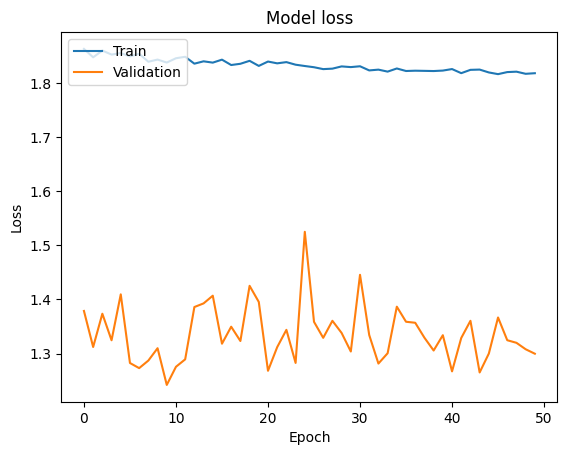

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
# Define new review data
new_reviews = [
    {'text': 'The flight was very comfortable and the staff were extremely friendly.', 'title': 'Great Flight'},
    {'text': 'The plane was delayed and the service was not good.', 'title': 'Bad Experience'}
]

# Preprocess the new review data
new_reviews_df = pd.DataFrame(new_reviews)
new_reviews_df['cleaned_text'] = new_reviews_df['text'].apply(preprocess_text)
new_reviews_df['cleaned_title'] = new_reviews_df['title'].apply(preprocess_text)

new_text_sequences = prepare_text(new_reviews_df, 'cleaned_text', tokenizer, max_length_text)
new_title_sequences = prepare_text(new_reviews_df, 'cleaned_title', tokenizer, max_length_title)

# Make predictions
predictions = model.predict({'text_input': new_text_sequences, 'title_input': new_title_sequences})
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[4.5160003]
 [4.389019 ]]


In [32]:
from tensorflow.keras.optimizers import Adam

# Compile the model with a different learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Train the model again
history = model.fit({'text_input': text_sequences, 'title_input': title_sequences}, df['rating'], epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 1.8134 - mae: 1.1027 - val_loss: 1.3134 - val_mae: 0.9365
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.8171 - mae: 1.0975 - val_loss: 1.3360 - val_mae: 0.9518
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 1.7752 - mae: 1.0903 - val_loss: 1.3431 - val_mae: 0.9546
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.8067 - mae: 1.1048 - val_loss: 1.3132 - val_mae: 0.9326
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.8098 - mae: 1.0984 - val_loss: 1.3220 - val_mae: 0.9386
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.8084 - mae: 1.0980 - val_loss: 1.3462 - val_mae: 0.9562
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 1.8033 - mae: 1.0962 - val_loss: 1.3323 - val_mae: 0.9458
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.7980 - mae: 1.0883 - val_loss: 1.3268 - val_mae: 0.9429
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 4

In [35]:
# Define new review data
new_reviews = [
    {'text': 'The flight was very comfortable and the staff were extremely friendly.', 'title': 'Great '},
    {'text': 'bad.', 'title': 'Bad Experience'}
]

# Preprocess the new review data
new_reviews_df = pd.DataFrame(new_reviews)
new_reviews_df['cleaned_text'] = new_reviews_df['text'].apply(preprocess_text)
new_reviews_df['cleaned_title'] = new_reviews_df['title'].apply(preprocess_text)

new_text_sequences = prepare_text(new_reviews_df, 'cleaned_text', tokenizer, max_length_text)
new_title_sequences = prepare_text(new_reviews_df, 'cleaned_title', tokenizer, max_length_title)

# Make predictions
predictions = model.predict({'text_input': new_text_sequences, 'title_input': new_title_sequences})
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[4.2624054]
 [4.4299154]]
